In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0


In [3]:
X_train[0].shape

(28, 28)

In [4]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [5]:
loss = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20


1500/1500 [==============================] - 13s 7ms/step - loss: 0.7255 - accuracy: 0.8033 - val_loss: 0.3490 - val_accuracy: 0.9008
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3372 - accuracy: 0.9039 - val_loss: 0.2873 - val_accuracy: 0.9176
Epoch 3/20
  96/1500 [>.............................] - ETA: 7s - loss: 0.2782 - accuracy: 0.9212

KeyboardInterrupt: 

<AxesSubplot:>

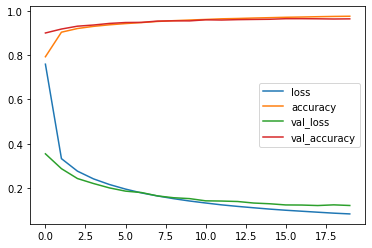

In [6]:
pd.DataFrame(loss.history).plot()

In [7]:
accuracy = model.evaluate(X_test, y_test)[1]
print(f'Accuracy on test set: {accuracy:.2%}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1042 - accuracy: 0.9671
Accuracy on test set: 96.71%


313/313 [==============================] - 1s 2ms/step


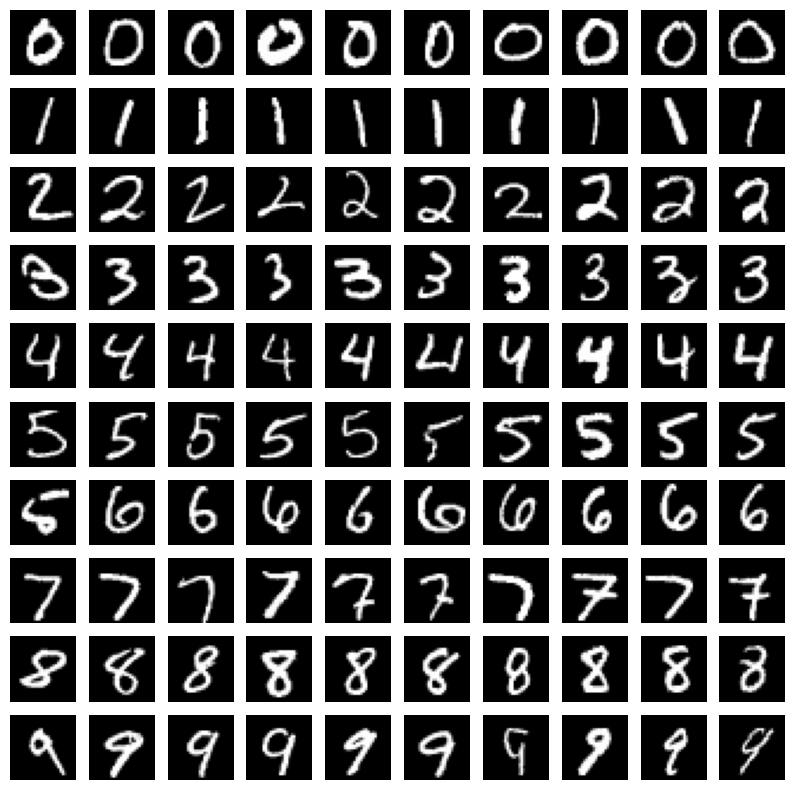

In [28]:
plt.figure(figsize=(10, 10))
for label in range(10):
    indices = np.where(model.predict(X_test).argmax(axis=1) == label)[0]
    for i in range(10):
        plt.subplot(10, 10, label * 10 + i + 1)
        plt.imshow(X_test[indices[i]], cmap='gray')
        plt.axis('off')
plt.show()

In [29]:
y= model.predict(X_test)
y

313/313 [==============================] - 1s 2ms/step


array([[8.2159892e-07, 1.9613759e-07, 1.0127857e-04, ..., 9.9816209e-01,
        9.4596098e-06, 1.6623705e-04],
       [7.2778680e-06, 1.8644611e-04, 9.9935132e-01, ..., 1.9758187e-10,
        8.5290529e-05, 1.5299420e-11],
       [1.9258230e-05, 9.9048257e-01, 3.6416264e-04, ..., 5.4008826e-03,
        2.3444539e-03, 3.5594331e-04],
       ...,
       [5.1045756e-08, 5.4533272e-10, 4.5149054e-08, ..., 1.7302985e-06,
        7.2664902e-06, 1.5348373e-03],
       [8.7989520e-07, 8.1321605e-07, 4.1621893e-09, ..., 1.5766796e-07,
        6.4553210e-04, 7.6170920e-08],
       [2.1932548e-05, 3.7546273e-09, 4.4318758e-06, ..., 2.1042554e-09,
        1.0624305e-08, 2.1301537e-08]], dtype=float32)

In [13]:
y[0]

array([8.2159892e-07, 1.9613759e-07, 1.0127857e-04, 1.5408077e-03,
       1.1084555e-07, 1.9045568e-05, 5.8755008e-11, 9.9816209e-01,
       9.4596098e-06, 1.6623705e-04], dtype=float32)

In [31]:
y.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
np.where(y.argmax(axis=1) == 1)

(array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64),)

In [23]:
np.where(y.argmax(axis=1) == 1)[0]

array([   2,    5,   14, ..., 9978, 9984, 9994], dtype=int64)